In [1]:
import pandas as pd
import numpy as np

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [3]:
# Read Data from CSV File
url = "https://raw.githubusercontent.com/neha-mishra/Evaluation-Projects/main/Loan_Application_Status_Prediction/loan_prediction.csv"
df = pd.read_csv(url)

# Adjust index to start from 1 instead of 0
df.index += 1

In [4]:
# Show top 5 rows of DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Check DataFrame Shape
df.shape

(614, 13)

In [6]:
# Get datatypes of all columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Get full info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 1 to 614
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Get Summery of DataFrame
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [14]:
# Identify missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Get DataFrame of rows with missing data
null_data = df[df.isnull().any(axis=1)]
null_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
12,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
17,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
20,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
598,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
601,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
602,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


<AxesSubplot:>

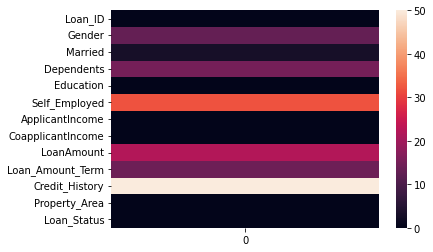

In [10]:
# Check DataFrame for null value
sns.heatmap(df.isnull().sum().to_frame())

In [11]:
# Dropping the unwanted column
df.drop('Loan_ID', axis=1, inplace=True)

In [15]:
# Inputing the missing values
for i in [df]:
    i['Gender'] = i['Gender'].fillna(df.Gender.dropna().mode()[0])
    i['Married'] = i['Married'].fillna(df.Married.dropna().mode()[0])
    i['Dependents'] = i['Dependents'].fillna(df.Dependents.dropna().mode()[0])
    i['Self_Employed'] = i['Self_Employed'].fillna(df.Self_Employed.dropna().mode()[0])
    i['Credit_History'] = i['Credit_History'].fillna(df.Credit_History.dropna().mode()[0])

In [16]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df1 = df.loc[:, ['LoanAmount', 'Loan_Amount_Term']]

imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
df1 = pd.DataFrame(imp.fit_transform(df1), columns=df1.columns)

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [18]:
for i in [df]:
    i['Gender'] = i['Gender'].map({"Male":0, "Female":1}).astype(int)
    i['Married'] = i['Married'].map({"No":0, "Yes":1}).astype(int)
    i['Education'] = i['Education'].map({"Not Graduate":0, "Graduate":1}).astype(int)
    i['Self_Employed'] = i['Self_Employed'].map({"No":0, "Yes":1}).astype(int)
    i['Credit_History'] = i['Credit_History'].astype(int)
    

In [ ]:
for i in [df]:
    i['Property_Area'] = i['Property_Area'].map({"Urban":0, "Rural":1, "Semiurban":2}).astype(int)
    i['Dependents'] = i['Dependents'].map({"0":0, "1":1, "2":2, "3":3})

In [23]:
df['Loan_Status'] = df['Loan_Status'].map({"N":0, "Y":1}).astype(int)

# Data Visualization

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

<AxesSubplot:xlabel='Dependents', ylabel='count'>

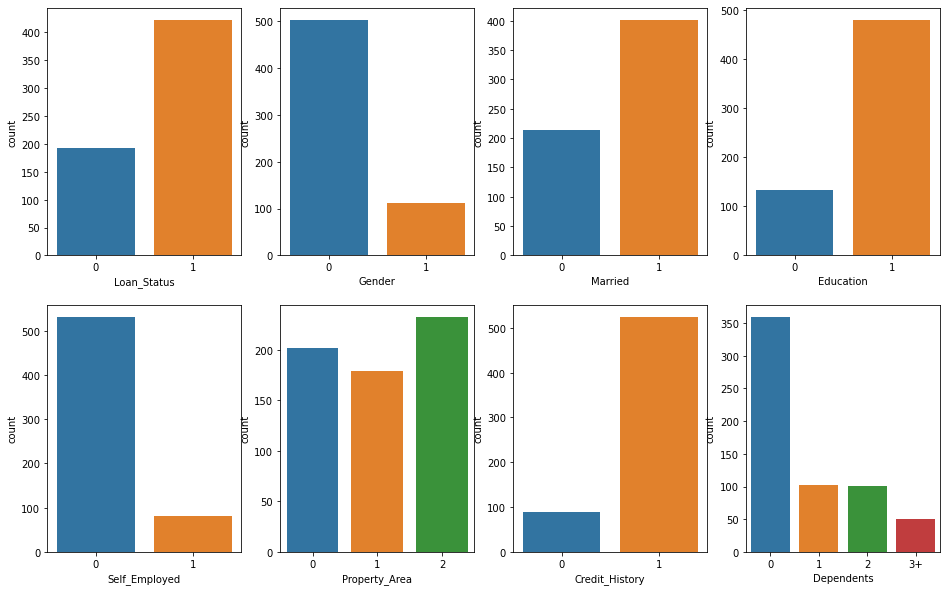

In [25]:
fig,ax = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Loan_Status', data=df, ax=ax[0][0])
sns.countplot('Gender', data=df, ax=ax[0][1])
sns.countplot('Married', data=df, ax=ax[0][2])
sns.countplot('Education', data=df, ax=ax[0][3])
sns.countplot('Self_Employed', data=df, ax=ax[1][0])
sns.countplot('Property_Area', data=df, ax=ax[1][1])
sns.countplot('Credit_History', data=df, ax=ax[1][2])
sns.countplot('Dependents', data=df, ax=ax[1][3])

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

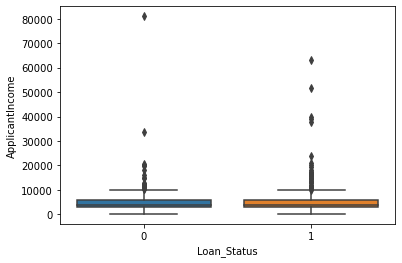

In [26]:
# Loan_Status v/s ApplicantIncome
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

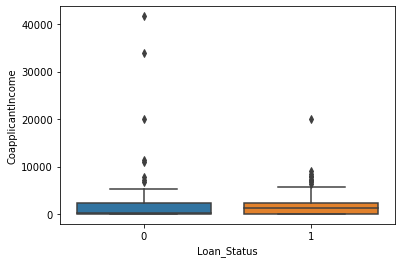

In [27]:
# Loan_Status v/s CoapplicantIncome
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)

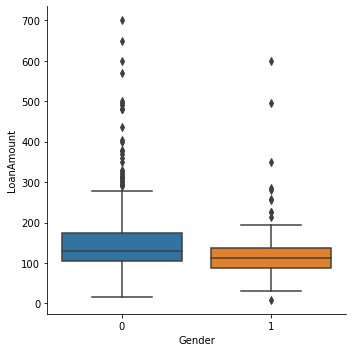

In [31]:
# Gender v/s LoanAmount
sns.catplot(x='Gender', y='LoanAmount', data=df, kind='box')

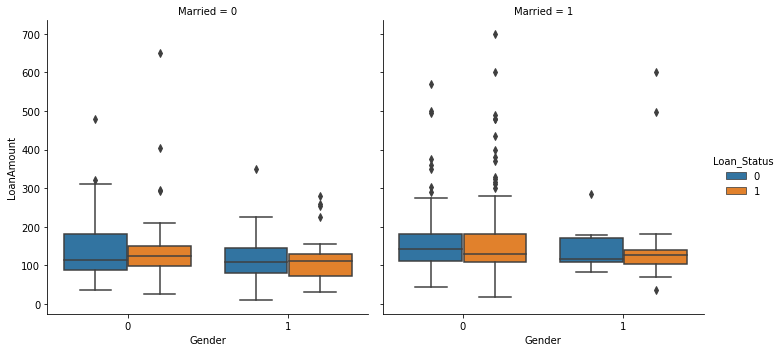

In [33]:
# LoanAmount v/s Loan_Status for each Gender and Married Status
sns.catplot(x='Gender', y='LoanAmount', data=df, kind='box', hue='Loan_Status', col='Married')

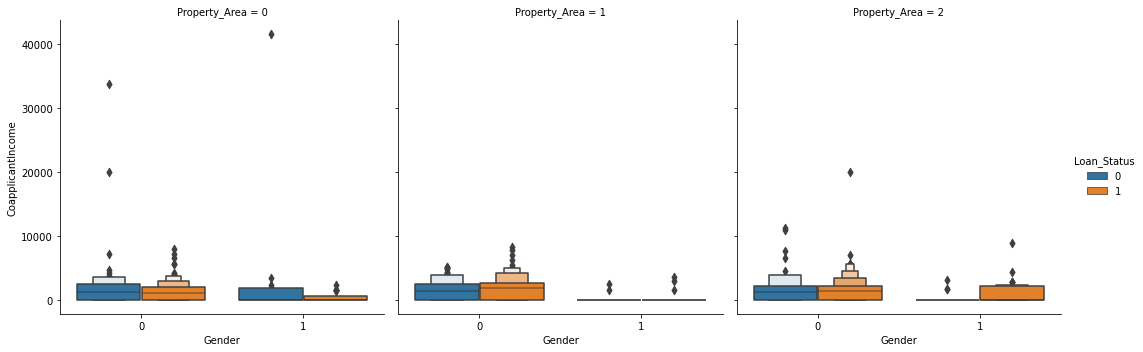

In [35]:
# CoapplicantIncome v/s Loan_Status for each Gender and Property Area
sns.catplot(x='Gender', y='CoapplicantIncome', data=df, kind='boxen', hue='Loan_Status', col='Property_Area')

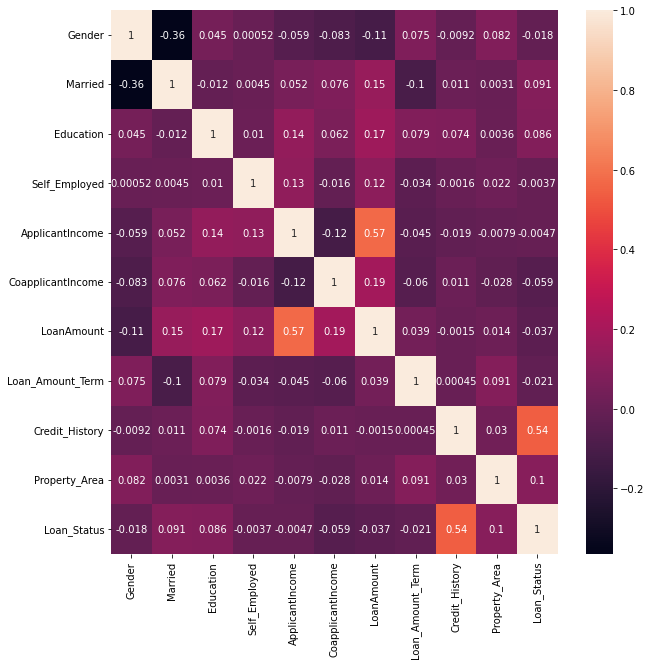

In [36]:
plt.figure(figsize=(10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [37]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape

(429,)

In [40]:
y_train.shape

(429,)